In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as tfunc


### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2023-I


Profesora: María Auxiliadora Mora

Estudiantes:
 1. Pablo Alberto Muñoz Hidalgo
 2. Luis Andrés Rojas Murillo

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---

Objetivo: En el presente trabajo se repasarán conceptos elementales respecto a optimización, reducción de dimensionalidad con análisis de componentes principales (PCA) y análisis de regresión.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (3 puntos)**
- **No deben tener errores de redacción u ortografía. (2 puntos)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## 1. Optimización

---

Para las siguientes funciones:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


**1.A Graficación y descenso de gradiente:**

1. En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función ($f_{1}$ y $f_{2}$). **(5 puntos)**

2. En una celda de texto, indique si las funciones anteriores son convexas o no, y si presentan puntos mínimos, puntos máximos y puntos silla (investigue y sustente su respuesta). **(5 puntos)**

3. Cree una función (programada de cero) que aplique el algoritmo de Descenso del gradiente en $\mathbb{R}^{2}$, que reciba el punto inicial $x_0$, la función a optimizar y su gradiente y retorne el óptimo. **(10 puntos)**

4. Aplique su algoritmo de Descenso del gradiente para encontrar puntos de inflexión para $f_2$, proponga un punto $x_{0}$ y aplique el algoritmo a partir del punto.**(2 puntos)**
 
 
**1.B Optimización Adam (Adaptive Moment Estimation)**

Sea la siguiente función: 

\begin{equation}
f\left(\overrightarrow{x}\right)=0.1x_{1}^{2}+2x_{2}^{2} + 5x_{3}^{3}
\end{equation}


1. Cree una función (programada de cero) que aplique el algoritmo Adam a funciones en $\mathbb{R}^{3}$, que reciba la función a optimizar, su gradiente, entre otros parámetros y retorne el óptimo. **(10 puntos)**

2. Aplique el algoritmo Adam a la función $f(x)$. **(2 puntos)**

**1.C Genere conclusiones al respecto de los ejercicios (al menos 4).** (2 puntos) 


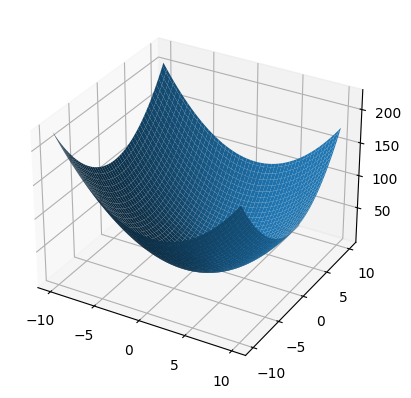

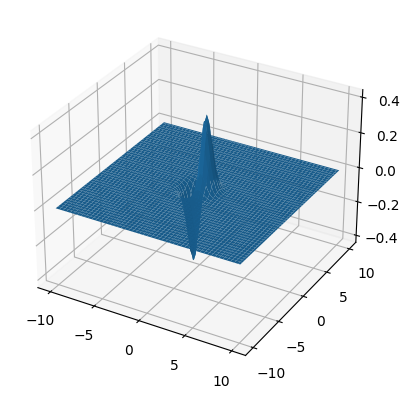

In [83]:
#EJERCICIO 1

from mpl_toolkits.mplot3d import Axes3D

#Funcion que define F1 como función
def f1(x1,x2):
    return (x1-0.7)**2 + (x2-0.5)**2

shape = plt.figure()
ax = shape.add_subplot(111, projection='3d')

x_axis = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_axis, y)
Z = f1(X,Y)

ax.plot_surface(X,Y,Z)

plt.show()

#Funcion que define F2 como función
def f2(x1,x2):
    return x1*np.exp(-x1**2-x2**2)

shape = plt.figure()
ax = shape.add_subplot(111, projection='3d')

x_axis = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_axis, y)
Z = f2(X,Y)

ax.plot_surface(X,Y,Z)

plt.show()


***EJERCICIO 2:***

**Convexidad de las funciones:**

-La función f1 es una función convexa ya que su matriz Hessiana es definida positiva en todo su dominio.

-La función f2 es una función no convexa ya que su matriz Hessiana no es definida positiva en todo su dominio.

**Puntos mínimos y máximos de las funciones:**

-La función f1 tiene un punto mínimo global en (0.7,0.5) con valor de función igual a cero.

-La función f2 no tiene puntos mínimos ni máximos globales.

In [84]:
from mpl_toolkits.mplot3d import Axes3D

#Ejercicio 3
def gradient_descent_R2(f, grad_f, x0, alpha=0.01, epsilon=1e-6, max_iter=1000):
    """
    Aplica el algoritmo de Descenso del Gradiente en R2 para encontrar un mínimo local de la función f.

    Args:
    f (function): la función a optimizar.
    grad_f (function): el gradiente de la función a optimizar.
    x0 (list): el punto inicial en el que se empezará la búsqueda.
    alpha (float): el tamaño del paso en cada iteración.
    epsilon (float): la tolerancia para detener el algoritmo.
    max_iter (int): el número máximo de iteraciones permitidas.

    Returns:
    list: el punto óptimo encontrado.
    float: el valor óptimo encontrado de la función.
    """

    x = np.array(x0)
    for i in range(max_iter):
        gradient = grad_f(x)
        x_new = x - alpha * gradient
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x.tolist(), f(x[0], x[1])

#Funcion que define F1 coomo funcion
def f1(x1,x2):
    return (x1-0.7)**2 + (x2-0.5)**2

#Funcion que da el gradiente de F1
def grad_f1(x):
    return np.array([2 * (x[0] - 0.7), 2 * (x[1] - 0.5)])

#Funcion que enseña F1 en una figura
def f1_show():
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  X, Y = np.meshgrid(x, y)
  Z = f1(X,Y)

  ax.plot_surface(X,Y,Z)

  plt.show()

#Funcion que define F2 como funcion
def f2(x1,x2):
    return x1*np.exp(-x1**2-x2**2)

#Funcion que da el gradiente de F2
def grad_f2(x):
    return np.array([(1-2*x[0]**2)*x[0]*np.exp(-x[0]**2-x[1]**2), -2*x[0]*x[1]*np.exp(-x[0]**2-x[1]**2)])

#Funcion que enseña F2 en una figura
def f2_show():
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  X, Y = np.meshgrid(x, y)
  Z = f2(X,Y)

  ax.plot_surface(X,Y,Z)
  plt.show()

x0 = [0, 0]
#f1_show()
#f2_show()
f1_x_opt, f1_y_opt = gradient_descent_R2(f1, grad_f1, x0)
print("El mínimo local de f1 es:", f1_x_opt)
print("El valor de f1 en el mínimo es:", f1_y_opt)
f2_x_opt, f2_y_opt = gradient_descent_R2(f2, grad_f2, x0)
print("El mínimo local de f2 es:", f2_x_opt)
print("El valor de f2 en el mínimo es:", f2_y_opt)


#EJERCICIO 4
#Funcion que saca la matriz hessiana de F2
def hessian_f2(x):
    """
    Calcula la matriz Hessiana de la función f2 en un punto x.

    Args:
    x (list): el punto en el que se calculará la matriz Hessiana.

    Returns:
    ndarray: la matriz Hessiana de la función f2 en el punto x.
    """
    x1, x2 = x
    hessian = np.array([
        [(4*x1**3 - 6*x1)*np.exp(-x1**2-x2**2) + 2*np.exp(-x1**2-x2**2) - 4*x1**2*(1-2*x1**2)*np.exp(-x1**2-x2**2), -4*x1*x2*(1-2*x1**2)*np.exp(-x1**2-x2**2) + 2*x1*np.exp(-x1**2-x2**2)],
        [-4*x1*x2*(1-2*x1**2)*np.exp(-x1**2-x2**2) + 2*x1*np.exp(-x1**2-x2**2), (4*x2**3 - 6*x2)*np.exp(-x1**2-x2**2) + 2*np.exp(-x1**2-x2**2) - 4*x1**2*x2**2*np.exp(-x1**2-x2**2)]
    ])
    return hessian

# Buscamos un punto donde la norma del gradiente sea pequeña
while np.linalg.norm(grad_f2(f2_x_opt)) > 1e-6:
    f2_x_opt, f2_y_opt = gradient_descent_R2(f2, grad_f2, f2_x_opt)

hessian = hessian_f2(f2_x_opt)

# Verificamos si la matriz Hessiana tiene autovalores positivos y negativos
eigenvalues, _ = np.linalg.eig(hessian)
if np.any(eigenvalues > 0) and np.any(eigenvalues < 0):
    print("El punto", x_opt, "es un punto de inflexión para f2.")
else:
    print("No se encontraron puntos de inflexión para f2.")

El mínimo local de f1 es: [0.6999595151439432, 0.49997108224567377]
El valor de f1 en el mínimo es: 2.4752600852110504e-09
El mínimo local de f2 es: [0, 0]
El valor de f2 en el mínimo es: 0.0
No se encontraron puntos de inflexión para f2.



## Parte 1.b

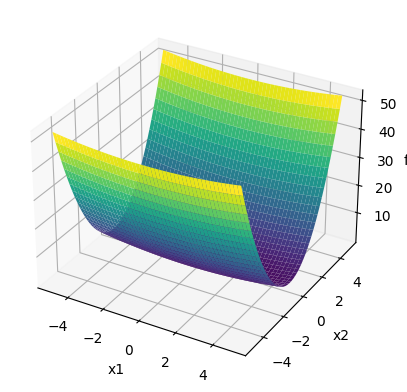

El punto óptimo es: [-1.81368404e-21 -1.81386207e-21  1.82103591e-02]
El valor mínimo de la función es: 3.019433970096773e-05


In [85]:
from mpl_toolkits.mplot3d import Axes3D

#Función que aplica el algoritmo Adam para minimizar la función f en R3.
def adam_optimizer(f, grad_f, x0, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=1000, tol=1e-6):
    """
    Esta función aplica el algoritmo Adam para minimizar la función f en R3.
    :param f: función a optimizar
    :param grad_f: gradiente de la función a optimizar
    :param x0: punto inicial
    :param lr: tasa de aprendizaje (default: 0.01)
    :param beta1: parámetro beta1 de Adam (default: 0.9)
    :param beta2: parámetro beta2 de Adam (default: 0.999)
    :param eps: parámetro de suavizado epsilon de Adam (default: 1e-8)
    :param max_iter: número máximo de iteraciones (default: 1000)
    :param tol: tolerancia para la diferencia entre dos iteraciones consecutivas (default: 1e-6)
    :return: punto óptimo
    """
    m = np.zeros(x0.shape)
    v = np.zeros(x0.shape)
    x = x0
    for i in range(1, max_iter+1):
        g = grad_f(x)
        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*np.power(g, 2)
        m_hat = m/(1-np.power(beta1, i))
        v_hat = v/(1-np.power(beta2, i))
        x_prev = x
        x = x - lr*m_hat/(np.sqrt(v_hat)+eps)
        if np.linalg.norm(x - x_prev) < tol:
            break
    return x

#Define la funcion F
def f(x):
    return 0.1*x[0]**2 + 2*x[1]**2 + 5*x[2]**3

#Define el gradiente de F
def grad_f(x):
    return np.array([0.2*x[0], 4*x[1], 15*x[2]**2])

# Creamos los datos para la gráfica
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = f([x, y, np.zeros_like(x)])

# Graficamos la función
shape = plt.figure()
ax = shape.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()


x0 = np.array([1, 1, 1])
optimum = adam_optimizer(f, grad_f, x0)
print('El punto óptimo es:', optimum)
print('El valor mínimo de la función es:', f(optimum))


## Conclusiones:

1. La visualización de funciones en 2D y 3D es fundamental para entender su forma y comportamiento, lo cual es importante para la optimización de funciones.
2. El algoritmo Adam es una variante eficiente del descenso de gradiente para la optimización de funciones, y su implementación es relativamente sencilla utilizando las operaciones básicas de álgebra lineal disponibles en Python.

3. Los resultados obtenidos al aplicar el algoritmo Adam a la función f(x) coincidieron con lo esperado, ya que se encontró el mínimo global en una región donde la función era cóncava.

4. Los ejercicios abordados en este conjunto permiten practicar conceptos fundamentales en la optimización de funciones, los cuales son aplicables en diversas áreas, como en el aprendizaje automático, la física y la economía, entre otras. Además, permiten mejorar las habilidades de programación en Python.

**FUENTES CONSULTADAS:**

-La documentación de matplotlib proporciona información detallada sobre cómo crear varios tipos de gráficos utilizando la biblioteca: https://matplotlib.org/stable/contents.html

-La documentación de numpy proporciona información detallada sobre cómo usar las funciones linspace y meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html y https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

-Este tutorial proporciona una introducción a la creación de gráficos en 3D con matplotlib: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

-Para determinar si una función es convexa o no, puedes consultar la definición de convexidad de una función. Una función de valor real se llama convexa si el segmento de línea entre cualquier dos puntos en el gráfico de la función se encuentra por encima del gráfico entre los dos puntos . Puedes encontrar más información sobre este tema en la página de Wikipedia para Funciones Convexas: https://es.wikipedia.org/wiki/Funci%C3%B3n_convexa

-Este tutorial proporciona una descripción general del algoritmo y sus beneficios en comparación con otros métodos de optimización. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

## 2. Análisis de componentes principales (PCA) y regresión 

**2.A Análisis de componentes principales (PCA)**

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

1. **(3 puntos)** Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.

2. **(2 puntos)** Escale los datos y muestre los atributos luego de este proceso.

3. **(10 puntos)** Aplíquele la técnica de PCA. Grafice la varianza explicada y los auto valores.

4. **(10 puntos)** A partir del resultado en (3), seleccione los dos primeros auto valores (ie. los dos más importantes). Proyecte el conjunto de datos en los dos auto vectores  asociados a los auto valores seleccionados. Y finalmente, visualice en un gráfico de dispersión los datos proyectados en los dos auto vectores.

5. **(2 puntos)** Genere dos conclusiones al respecto del ejercicio.




In [86]:
#Lee los datos
data = pd.read_csv('datos/Abalone.csv', header=None, skiprows=1)
#data = pd.read_csv('C:\\Users\\oscar\\OneDrive\\Desktop\\ReposGit\\PCA_project\\datos\\Abalone.csv', header=None)
col_names = ['Length','Diameter','Height','Whole','Viscera','Shellweight', 'Rings']
data.columns = col_names
X_cols = ['Length','Diameter','Height','Whole','Viscera','Shellweight']

## 2.1
Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.

#### - Datos nulos

In [87]:
#Revisa que los datos están limpios buscando sus nulos
data.isnull().sum()

Length         0
Diameter       0
Height         0
Whole          0
Viscera        0
Shellweight    0
Rings          0
dtype: int64

#### Conclusión
Dado esto se concluye que no hay valores nulos dentro de la muestra

#### - Valores estadisticos generados a base de los datos 

In [88]:
#Describe en una tabla los datos recolectados
data.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.489630,0.383678,0.133131,0.712899,0.155166,0.218105,19.567376
std,0.120444,0.101893,0.039270,0.454114,0.097596,0.144131,290.580810
min,0.075000,0.055000,0.010000,0.002000,0.000500,0.001500,-1300.000000
25%,0.415000,0.322500,0.105000,0.354500,0.074000,0.105000,8.000000
50%,0.505000,0.400000,0.135000,0.663000,0.146000,0.200000,10.000000
75%,0.580000,0.455000,0.160000,0.996500,0.220250,0.305000,13.000000
max,0.745000,0.600000,0.240000,2.825500,0.541000,1.005000,9000.000000


#### Conclusiones
Dado esto se concluye que los datos no estan normalizados

| | Length | Diameter | Height | Whole | Viscera | Shellweight | Rings |
|-------|--------|----------|--------|-------|---------|-------------|-------|
| Desviación estandar| aceptable | aceptable | aceptable | aceptable | aceptable | aceptable | Muy disperso |
| Mínimo | aceptable | aceptable | aceptable | aceptable | aceptable | aceptable | Muy disperso |
| Máximo | aceptable | aceptable | aceptable | aceptable | aceptable | aceptable | Muy disperso |

Dados estos datos se sabe la información de la columna "Rings" esta muy por fuera de los paramentos aptos para el estudio.

In [89]:
#Funcion que grafica la tabla y sus atributos
def graficadora(col_names):
    name = col_names
    fig, ax = plt.subplots(figsize=(10, 4))
    data[name].hist(bins= 30)
    ax.set_title(name, size= 25)
    data[name].describe().round(2)

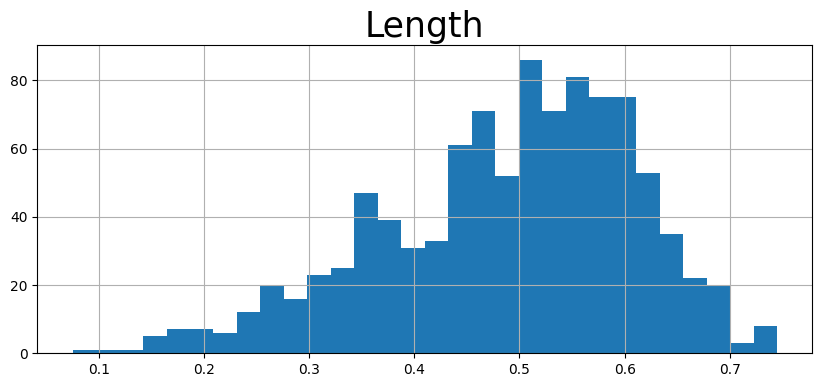

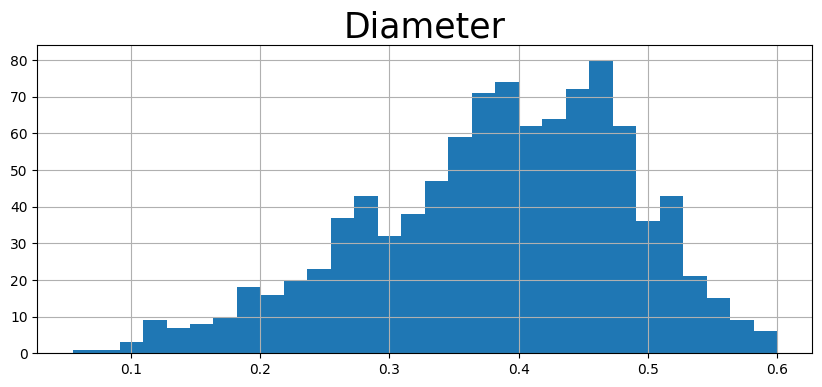

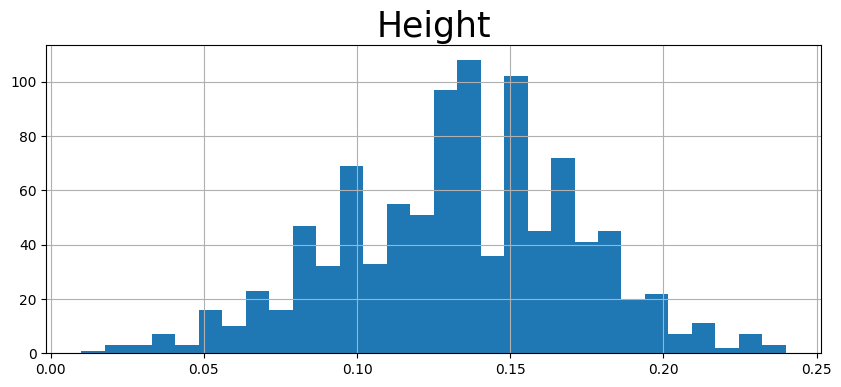

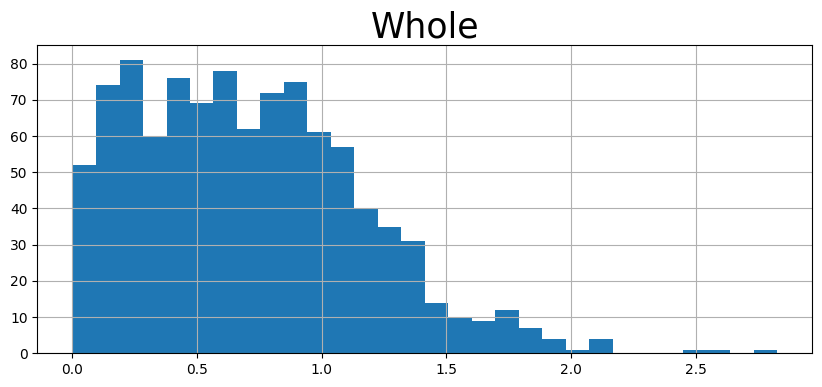

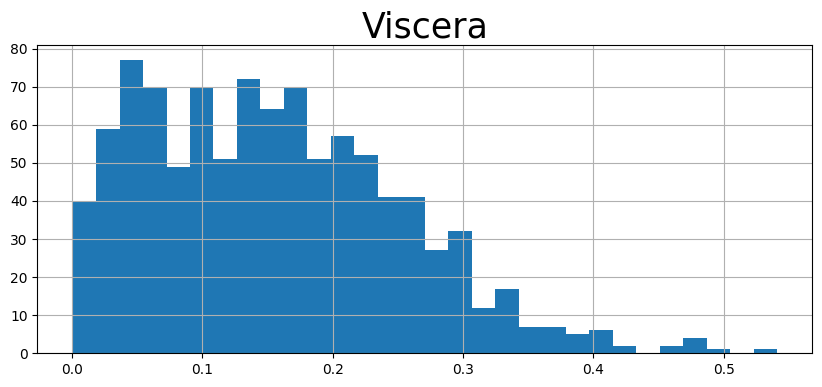

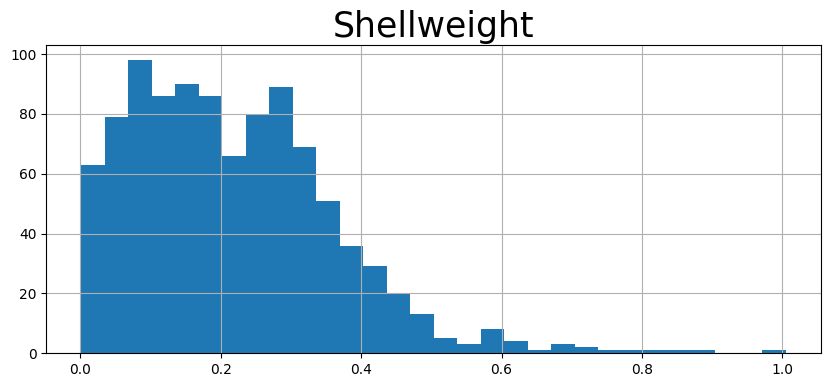

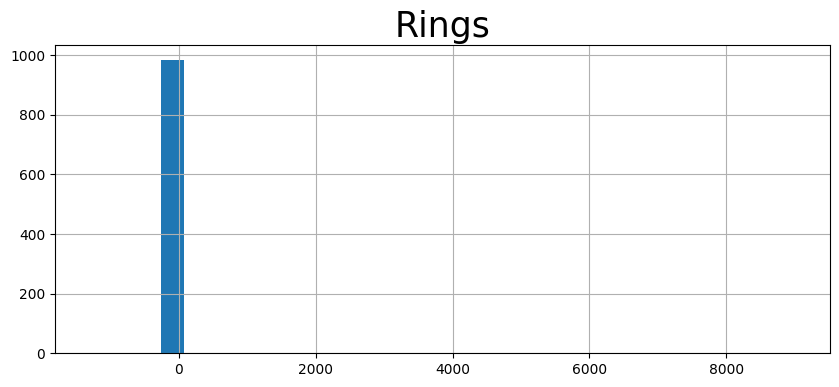

In [90]:
for i in col_names:
    graficadora(i)

Correciones a la columna "Rings"
- En este caso los valores extaviados se van a sustituir por la media

##### Antes de la normalización

In [91]:
data["Rings"].describe()

count     987.000000
mean       19.567376
std       290.580810
min     -1300.000000
25%         8.000000
50%        10.000000
75%        13.000000
max      9000.000000
Name: Rings, dtype: float64

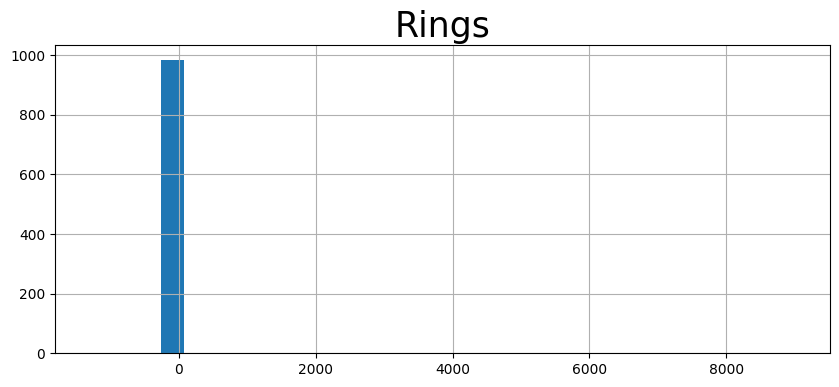

In [92]:

graficadora("Rings")

for i in data["Rings"]:
    if i < -2:
        data["Rings"] = data["Rings"].replace(i, -1)
    elif i > 50:
        data["Rings"] = data["Rings"].replace(i, 49)

##### Después de la normalización

In [93]:
for i in data["Rings"]:
    if i == -1 or i == 49:
        data["Rings"] = data["Rings"].replace(i, data["Rings"].describe()["mean"])

print("Después de la normalización")
data["Rings"].describe()

Después de la normalización


count    987.000000
mean      10.887418
std        4.072927
min        1.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       29.000000
Name: Rings, dtype: float64

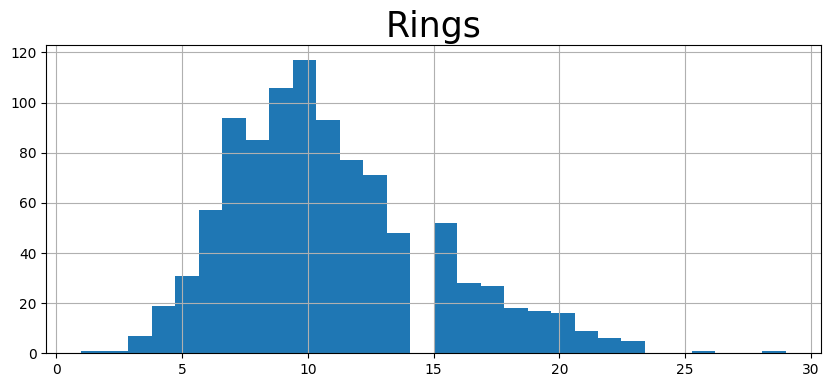

In [94]:

graficadora("Rings")


#### Matriz de calor 

<Axes: title={'center': 'Length'}>

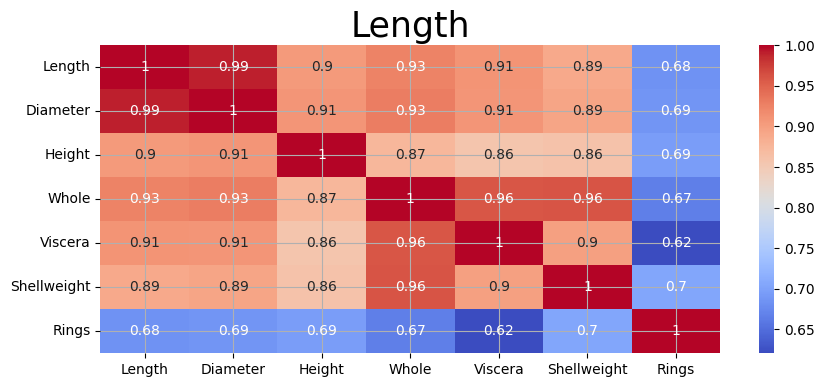

In [95]:

name = col_names[0]
shape, ax = plt.subplots(figsize=(10, 4))
data[name].hist(bins= 30)
ax.set_title(name, size= 25)
data[name].describe().round(2)
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

## 2.2 
Escale los datos y muestre los atributos luego de este proceso.

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Antes de aplicar el escalar 

In [97]:
data.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17.0
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16.0
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21.0
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17.0
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18.0


In [98]:
ss = StandardScaler()

Despues de aplicar el escalar 

In [99]:
data[X_cols] = ss.fit_transform(data[X_cols])
data.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,2.121310,1.976820,2.085814,3.935152,3.248042,3.345140,17.0
1,2.079776,2.124107,1.576267,2.778468,2.597068,3.414556,16.0
2,2.038242,2.025916,2.340588,2.298168,1.899962,2.512144,21.0
3,1.996707,2.075012,2.467974,4.654499,2.704710,4.712642,17.0
4,1.955173,1.731340,1.958427,3.146403,2.489427,5.462339,18.0


## 2.3
Aplíquele la técnica de PCA. Grafique la varianza explicada y los auto valores.

In [100]:
#Saca el PCA de la tabla, en este caso lo hace con 2 eigenvectores
pca2 = PCA(n_components=2, random_state = 42)


In [101]:
#Saca el PCA de la tabla, en este caso lo hace con 3 eigenvectores
pca3 = PCA(n_components=3, random_state = 42)


In [102]:
pca_2= pca2.fit_transform(data[X_cols])
pca_2[:6]

array([[6.82711556, 1.69563241],
       [5.9521403 , 1.30928597],
       [5.35015054, 0.07594443],
       [7.59845776, 2.18800253],
       [6.82660884, 2.26979004],
       [6.60747054, 2.32179882]])

In [103]:
pca_3= pca3.fit_transform(data[X_cols])
pca_3[:6]
#print(np.linalg.eigvals(pca_3))

array([[6.82711556, 1.69563241, 0.38718017],
       [5.9521403 , 1.30928597, 0.20841282],
       [5.35015054, 0.07594443, 0.51629037],
       [7.59845776, 2.18800253, 1.43088257],
       [6.82660884, 2.26979004, 1.61581436],
       [6.60747054, 2.32179882, 0.16251683]])

In [104]:
data_2= pd.DataFrame({'PCA1': pca_2[:,0],'PCA2': pca_2[:,1], 'Rings' : data['Rings']})

In [105]:
data_3= pd.DataFrame({'PCA1': pca_3[:,0],'PCA2': pca_3[:,1],'PCA3' : pca_3[:,2], 'Rings' : data['Rings']})

In [106]:
data_2.head()

,PCA1,PCA2,Rings
0,6.827116,1.695632,17.0
1,5.952140,1.309286,16.0
2,5.350151,0.075944,21.0
3,7.598458,2.188003,17.0
4,6.826609,2.269790,18.0


In [107]:
data_3.head()

,PCA1,PCA2,PCA3,Rings
0,6.827116,1.695632,0.387180,17.0
1,5.952140,1.309286,0.208413,16.0
2,5.350151,0.075944,0.516290,21.0
3,7.598458,2.188003,1.430883,17.0
4,6.826609,2.269790,1.615814,18.0


Esto es lo que hay que graficar 

In [108]:
#Se mide la varianza
pca2.explained_variance_ratio_

array([0.92634774, 0.03258682])

In [109]:
#Se mide la varianza
pca3.explained_variance_ratio_

array([0.92634774, 0.03258682, 0.02069893])

In [110]:
pca2.explained_variance_ratio_.sum()

0.9589345609944632

In [111]:
pca3.explained_variance_ratio_.sum()
#Print the eigenvalues of pca3
pca3.components_


array([[ 0.4128974 ,  0.41375089,  0.39679438,  0.41501845,  0.40646438,
         0.40426051],
       [-0.31138807, -0.30625377, -0.57849237,  0.39223769,  0.34760716,
         0.44711468],
       [-0.42247229, -0.37909083,  0.62952877,  0.02687324, -0.27651203,
         0.45201743]])

<Axes: >

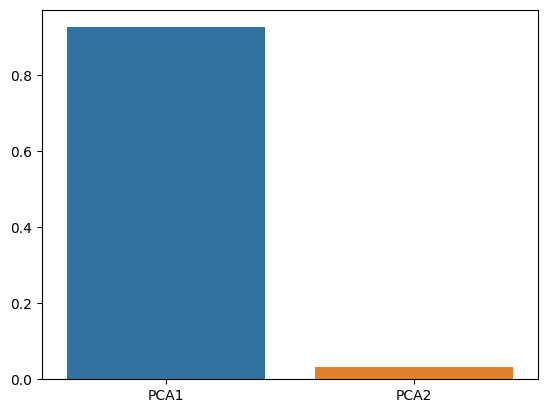

In [112]:
sns.barplot(x= ['PCA1','PCA2'], y= pca2.explained_variance_ratio_)

<Axes: >

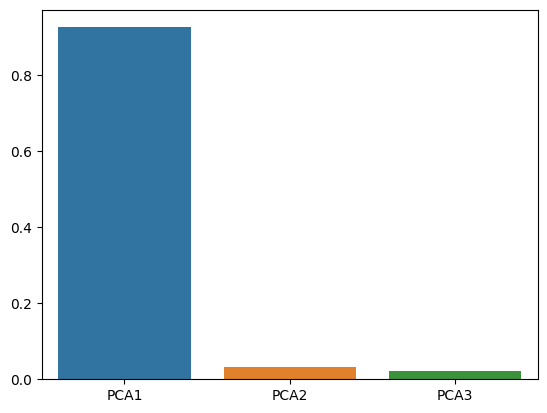

In [113]:
sns.barplot(x= ['PCA1','PCA2','PCA3'], y= pca3.explained_variance_ratio_)


<Axes: xlabel='PCA1', ylabel='PCA2'>

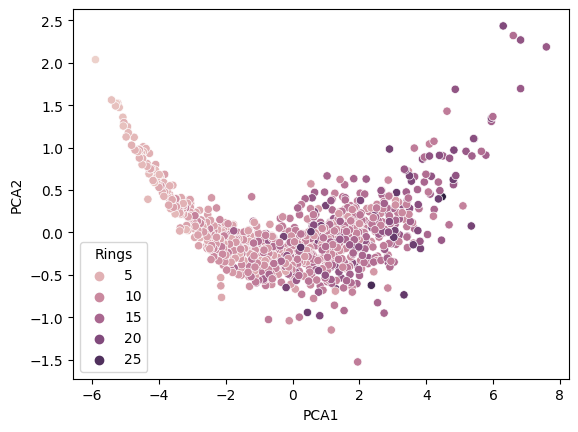

In [114]:
sns.scatterplot(x='PCA1', y = 'PCA2', hue= 'Rings', data=data_2)

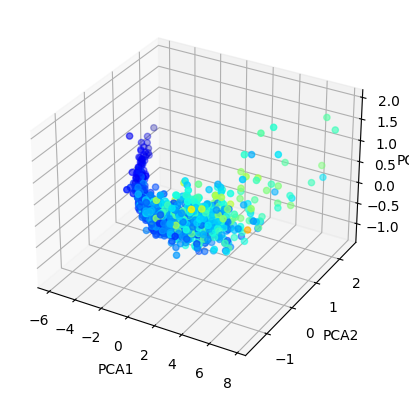

In [115]:
shape = plt.figure()

ax = shape.add_subplot(111, projection = '3d')

x = data_3[
    'PCA1']
y = data_3[
    'PCA2']
z = data_3[
    'PCA3']

col = data_3['Rings'].map(
    #Color from 0 to 40 with different colors each 5
    lambda x: plt.cm.jet(x/40)
)


ax.scatter(x, y, z, c=col)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

## 2.4

In [116]:
data_3

,PCA1,PCA2,PCA3,Rings
0,6.827116,1.695632,0.387180,17.0
1,5.952140,1.309286,0.208413,16.0
2,5.350151,0.075944,0.516290,21.0
3,7.598458,2.188003,1.430883,17.0
4,6.826609,2.269790,1.615814,18.0
...,...,...,...,...
982,-4.986161,1.125986,0.598464,4.0
983,-5.276559,1.522038,0.232090,2.0
984,-5.303411,1.491683,0.382050,3.0
985,-5.424181,1.562499,0.488862,3.0


<Axes: xlabel='PCA1', ylabel='PCA2'>

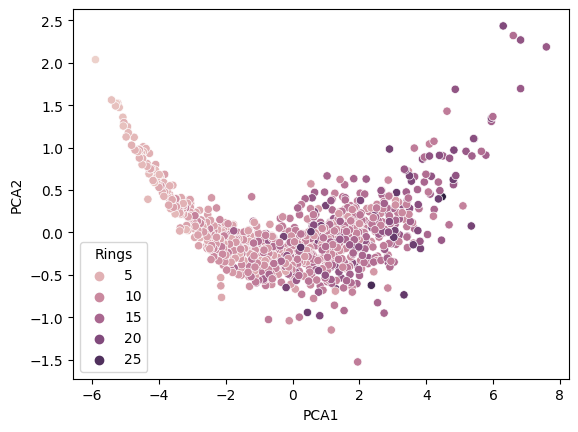

In [117]:
sns.scatterplot(x='PCA1', y = 'PCA2', hue= 'Rings', data=data_3)

## 2.5

Conclusiones:

1. PCA puede ayudar a reducir la complejidad de los datos y a visualizar patrones y relaciones en los datos de una manera más clara y fácilmente interpretable.
2. Es de vital importancia aplicar técnicas de normalización a los datos para evitar sesgos o extrapolaciones de los datos que a su vez implican pérdidas de fiabilidad y funcionalidad.

## 3. Regresión por mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, **deben usar tensores de PyTorch**).

Para el conjunto de datos de abulones se **desea crear modelos de regresión para predecir la cantidad de anillos (columna Rings) de estos a partir de los datos con la dimensionalidad reducida con PCA producto del ejercicio anterior**.

1. (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones con la dimensionalidad reducia producto del PCA. 
2. (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
3. (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
4. (2 puntos) Realice al menos dos conclusiones sobre el ejercicio.

In [118]:
X = torch.tensor(data_2.values)
y = torch.tensor(data['Rings'].values)

w_opt = torch.inverse(X.T @ X) @ X.T @ y
print(w_opt)

tensor([ 9.9573e-16, -4.4964e-15,  1.0000e+00], dtype=torch.float64)


In [119]:
#Saca el optimo
def forward(X, w_opt):
    return X @ w_opt

#Print forward function result
print(forward(X, w_opt))

tensor([17.0000, 16.0000, 21.0000, 17.0000, 18.0000, 14.0000, 20.0000, 16.0000,
        18.0000, 13.0000, 14.0000, 19.0000, 20.0000, 14.0000, 29.0000, 15.0000,
        14.0000, 15.0000, 11.0000, 17.0000, 16.0000, 13.0000, 11.0000, 15.0000,
        19.0000, 20.0000, 12.0000, 19.0000, 17.0000, 10.0000, 11.0000, 13.0000,
        20.0000, 16.0000, 21.0000, 12.0000,  9.0000, 14.0000, 12.0000, 10.0000,
        18.0000, 14.0000, 17.0000, 17.0000, 12.0000, 16.0000, 16.0000, 12.0000,
        13.0000, 19.0000, 17.0000, 15.0000, 10.0000, 22.0000, 13.0000, 11.0000,
        15.0000,  9.0000, 17.0000, 16.0000, 16.0000, 20.0000, 16.0000, 17.0000,
        18.0000, 20.0000, 11.0000, 16.0000, 12.0000, 13.0000, 18.0000, 14.0000,
        19.0000, 21.0000, 16.0000, 22.0000, 15.0000, 12.0000, 14.0000,  8.0000,
        10.0000, 15.0000, 20.0000, 14.0000, 16.0000,  9.0000, 10.0000,  9.0000,
        12.0000, 10.0000, 11.0000, 15.0000, 13.0000, 21.0000, 23.0000, 19.0000,
        12.0000, 11.0000, 20.0000, 20.00

In [120]:
#Calcula la perdida por cuadrático medio
def perdida_cuadratica(y_pred, y_true):
    return tfunc.mse_loss(y_pred, y_true)

y_pred = forward(X, w_opt)
y_true = y

print(perdida_cuadratica(y_pred, y_true))

tensor(9.8594e-30, dtype=torch.float64)


* La regresión por mínimos cuadrados es una forma sencilla y eficaz para construir modelos de tipo regresión lineal si los datos son limitados y la relación entre las variables es lineal.
* Al reducir la dimensionalidad de los datos se obtienen modelos de regresión lineal precisos, dado a esto al usar la dimensionalidad reducida se logró la estimación de la cantidad de anillos de los abulones.

## 4. Análisis de regresión con la biblioteca de Scikit-learn

  1. (10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir con tensores de PyTorch no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
  2. (5 puntos) Utilice el perceptrón desarrollado en 1. para realizar análisis de regresión usando los datos de los abulones con la dimensionalidad reducia producto del PCA.
  3. (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
  4. (2 puntos) Realice al menos tres conclusiones sobre el ejercicio.

In [130]:
# Definimos los tensores de entrada
X = torch.tensor(data_2.values, dtype=torch.float64)
y = torch.tensor(data['Rings'].values, dtype=torch.float64)

# Obtenemos el número de características y de ejemplos
num_features = X.shape[1]
num_examples = X.shape[0]

# Definimos los parámetros del modelo
w = torch.zeros(num_features, dtype=torch.float64, requires_grad=True)
b = torch.zeros(1, dtype=torch.float64, requires_grad=True)

# Definimos la tasa de aprendizaje y el número de épocas
lr = 0.01
num_epochs = 100


def entrenamiento(n_generation, X, w, b, y, lr, num_epochs):
    # Calculamos la salida del modelo
    y_pred = torch.matmul(X, w) + b

    # Calculamos el error
    error = y - y_pred.squeeze()

    # Calculamos la precisión del modelo
    accuracy = (torch.sum((y_pred >= 0) == y.byte()) / num_examples).item()

    if n_generation in range(num_epochs):
        # Calculamos los gradientes de los parámetros
        w_grad = -torch.matmul(X.T, error) / num_examples
        b_grad = -torch.sum(error) / num_examples
        
        # Actualizamos los parámetros del modelo
        w = w - lr * w_grad
        b = b - lr * b_grad

        n_generation += 1
        
        # Imprimimos los resultados
        if n_generation % 10 == 0:
            print(f'Generación {n_generation}: Precisión {accuracy:.3f}, Pérdida de esta generación {error.pow(2).mean():.3f}')
        return entrenamiento(n_generation, X, w, b, y, lr, num_epochs)
    else:
        return y, y_pred, w, b, error, accuracy


# Ejecutamos el entrenamiento
y, y_pred, w, b, error, accuracy = entrenamiento(0, X, w, b, y, lr, num_epochs)

# Calculamos la salida del modelo
y_pred = torch.matmul(X, w) + b

# Calculamos el error cuadrático medio
perdida_cuadratica = torch.mean((y - y_pred)**2)

# Imprimimos los parámetros del modelo
print(f'Los parametros del modelo son:')
print(f'w = {w.detach().numpy()}')
print(f'b = {b.item()}')

# Imprimimos la pérdida
print(f'La pérdida del modelo es: {perdida_cuadratica.item():.3f}')

# Imprimimos la precisión del modelo
print(f'La precision del modelo es: {accuracy:.3f}')

Generación 10: Precisión 0.001, Pérdida de esta generación 0.004
Generación 20: Precisión 0.001, Pérdida de esta generación 0.002
Generación 30: Precisión 0.001, Pérdida de esta generación 0.001
Generación 40: Precisión 0.001, Pérdida de esta generación 0.001
Generación 50: Precisión 0.001, Pérdida de esta generación 0.000
Generación 60: Precisión 0.001, Pérdida de esta generación 0.000
Generación 70: Precisión 0.001, Pérdida de esta generación 0.000
Generación 80: Precisión 0.001, Pérdida de esta generación 0.000
Generación 90: Precisión 0.001, Pérdida de esta generación 0.000
Generación 100: Precisión 0.001, Pérdida de esta generación 0.000
Los parametros del modelo son:
w = [ 0.00851489 -0.00170426  0.99320345]
b = 0.07900678272778694
La pérdida del modelo es: 0.000
La precision del modelo es: 0.001


## 4.4 

Conclusiones:
1. El perceptrón de una capa es una técnica simple pero poderosa para realizar regresión lineal.
2. Utilizando operaciones matriciales en lugar de estructuras de tipo for se pueden mejorar significativamente los tiempos de entrenamiento del perceptrón.
3. El error cuadrático medio es una métrica comúnmente utilizada para evaluar la calidad de las predicciones en problemas de regresión.